In [2]:
# pandas の read_csv を使って mnist のデータを読み込む
from pandas import read_csv
train_data = read_csv("mnist_train.csv", header=None)
test_data = read_csv("mnist_test.csv", header=None)

In [3]:
# データ型の確認
print(train_data.shape)
print(test_data.shape)

(60000, 785)
(10000, 785)


In [4]:
# train_data, test_data の最初の列は target である各レコードの数字(0〜9)なので y_train, y_test として別保存
import numpy as np
y_train = np.array(train_data[[0]])
y_test = np.array(test_data[[0]])

In [5]:
# データ型の確認
print(y_train.shape)
print(y_test.shape)

(60000, 1)
(10000, 1)


In [6]:
# target を除いたデータを X_train, X_test として保存
# .as_matrix() としているのは numpy array 型にしないと
# scikit-learn で読み込めないため
del train_data[0]
del test_data[0]
X_train = train_data.as_matrix()
X_test = test_data.as_matrix()
del train_data
del test_data

In [7]:
# データ型の確認
print(X_train.shape)
print(X_test.shape)
# 各レコードのデータ X は28×28ピクセルの画像データ
28*28

(60000, 784)
(10000, 784)


784

[9]


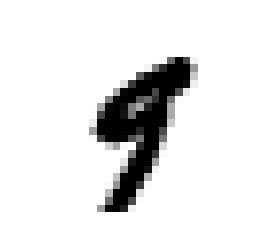

In [8]:
RowNum = 36000
# ↑の番号の target の数値とレコードの画像を表示
print(y_train[RowNum])

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X_train[RowNum]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
print(sgd_clf.predict([some_digit]))
print(sgd_clf.score(X_train,y_train_5))
print(sgd_clf.score(X_test,y_test_5))

/Users/syuheyk/.pyenv/versions/anaconda3-4.3.1/envs/py3.6.0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/syuheyk/.pyenv/versions/anaconda3-4.3.1/envs/py3.6.0/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False]
0.964066666667
0.9646


5を表すデータはそもそも全体の10%程度(1/10)しかないのは問題で，どんな画像が来ても"5ではない"と判定する予測器でも90%当ててしまいます．つまり，ふつうのscoreはこの手のモデルのパフォーマンス指標として好まれないということ．特に，skewed datasets(いくつかのクラスが他よりも多く実現するクラス)に対しては注意すべし．

In [11]:
y_train_pred = sgd_clf.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54273,   306],
       [ 1850,  3571]])

↑の出力の意味：

||予測値外れ|予測値当たり|
|:--:|:--:|:--:|
|実際値外れ|54273|306|
|実際値当たり|1850|3571|

- 各行は実際のクラスで1行目が外れ・2行目が当たり
- 各列は予測したクラスで1列目が外れと予測・2列目が当たりと予測
- 今回で言えば，1行1列は54,273個の画像が正しく5ではない(外れ・外れ)と予測され，3571個の画像が正しく5である(当たり・当たり)と予測されている．
- 注目すべきはそれ以外の要素で，1850個の画像が5なのに5ではないと予測(当たり・外れ)されてしまった数，306個の画像が5ではないのに5と予測(外れ・当たり)と予測されてしまった数となっている．

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train_5)
#sgd_clf.fit(X_train, y_train_5)
print(knn_clf.predict([some_digit]))
#print(knn_clf.score(X_train,y_train_5))
print(knn_clf.score(X_test,y_test_5))

/Users/syuheyk/.pyenv/versions/anaconda3-4.3.1/envs/py3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[False]
0.9924


In [13]:
y_train_pred = knn_clf.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54579,     0],
       [    0,  5421]])